In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = "Data/Iris.csv"
df = pd.read_csv(data_path, encoding = 'latin-1')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Different ways to view the dataframe with differnt functions


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Handle NAN in 2 different ways

* Fill it with random data_path
    
* Remove the NAN

In [5]:
df = df.dropna()

In [6]:
filter1 = (df['SepalLengthCm'] < 6)

dfv1 = df[filter1]

dfv1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             83 non-null     int64  
 1   SepalLengthCm  83 non-null     float64
 2   SepalWidthCm   83 non-null     float64
 3   PetalLengthCm  83 non-null     float64
 4   PetalWidthCm   83 non-null     float64
 5   Species        83 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.5+ KB


## Example of How We can Analyze Data w/ SVM

In [7]:
from sklearn import svm

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

y = df[['Species']]

We can use the LabelEncoder to treat the String in the 'y' dataframe as integers/floats

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

yEncoded = le.fit_transform(y['Species'])

In [9]:
print(yEncoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
IrisPredictionModel = svm.SVC()

IrisPredictionModel.fit(X, yEncoded)

SVC()

In [11]:
prediciton = IrisPredictionModel.predict([[4.9, 5,5, 0.2]])

returnToOriginal = le.inverse_transform(prediciton)

print(returnToOriginal)

['Iris-versicolor']


/Users/hanliyang/Documents/GitHub/Parkinson-Prediagnosis/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Example of How We can Analyze Data w/ K-Means Clustering

Text(0, 0.5, 'Sepal Width')

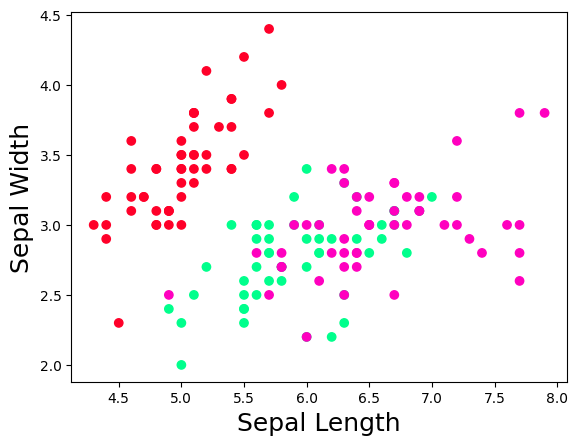

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = df[['SepalLengthCm', 'SepalWidthCm']]

# Graph the X values compared to the Y values
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'], c = yEncoded, cmap = 'gist_rainbow')
plt.xlabel("Sepal Length", fontsize = 18)
plt.ylabel("Sepal Width", fontsize = 18)

In [ ]:
km = KMeans(n_clusters = 3, random_state = 0)

km.fit(X)

KMeans(n_clusters=3, random_state=0)

Text(0, 0.5, 'Sepal Width')

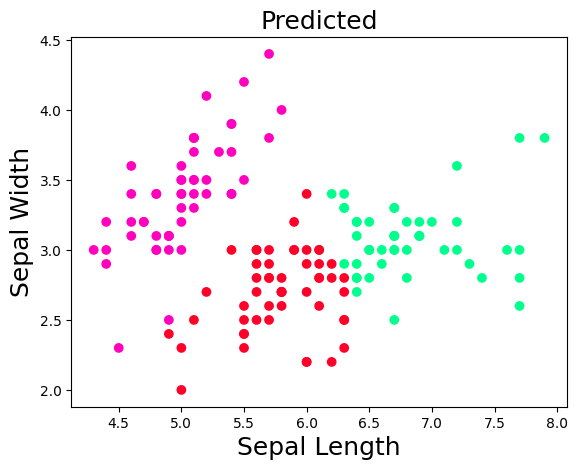

In [ ]:
new_labels = km.labels_
plt.title("Predicted", fontsize = 18)
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'], c = new_labels, cmap = 'gist_rainbow')
plt.xlabel("Sepal Length", fontsize = 18)
plt.ylabel("Sepal Width", fontsize = 18)

Train-test Split